# O Teste z para uma Amostra

O teste Z para uma amostra é utilizado para determinar se a **média de uma amostra (denotada como (x̅) é significativamente diferente da média populacional conhecida (denotada como 𝜇)**, sob a *suposição* de que a distribuição da população é normal. Esse teste é apropriado quando o tamanho da amostra é grande (tipicamente, n ≥ 30) e a variância da população (σ² 
) é conhecida. 

<p>As hipóteses nulas e alternativas do teste z são as seguintes:</p>
<div style="border:2px solid black; padding: 10px; background-color:#CEE0DC">
    <ul>
        <li><strong>H0</strong>:  A média da população é igual a um valor específico. Matematicamente, \(H_0: \mu = \mu_0\), onde \(\mu_0\) é o valor especificado para a média populacional.</li><br>
        <li><strong>HA</strong>: Depende do contexto do teste: <br> 
  - Bicaudal: \(H_a: \mu \neq \mu_0\) <br>
  - Unicaudal à direita: \(H_a: \mu > \mu_0\)<br>
  - Unicaudal à esquerda: \(H_a: \mu < \mu_0\)</li>
    </ul>  </div>

Nível de significância (α): É a probabilidade de rejeitar a hipótese nula quando ela é verdadeira. Comumente, (α) é escolhido como 0.05.

- Para um teste de duas caudas com (α = 0.05), os valores críticos seriam aproximadamente \(1.96\) (dependendo da tabela de distribuição normal padrão).
- Para um teste unicaudal, o valor crítico seria \(1.645\) para (α = 0.05) na cauda direita, ou \(-1.645\) na cauda esquerda.

# O Teste z para uma Amostra

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Função para realizar o teste Z para uma amostra
def teste_z_amostra(media_amostra, media_populacional, desvio_populacional, tamanho_amostra, alpha):
    
    # Calcula a estatística de teste Z
    z = (media_amostra - media_populacional) / (desvio_populacional / np.sqrt(tamanho_amostra))
    
    # Determina o tipo de teste com base na direção da diferença
    tipo_teste = 'bicaudal'
    if media_amostra > media_populacional:
        tipo_teste = 'unicaudal_direita'
    elif media_amostra < media_populacional:
        tipo_teste = 'unicaudal_esquerda'

    # Determina o valor crítico com base no tipo de teste
    if tipo_teste == 'bicaudal':
        valor_critico = stats.norm.ppf(1 - alpha / 2)
        
        regiao_critica = (-valor_critico, valor_critico)
    elif tipo_teste == 'unicaudal_direita':
        valor_critico = stats.norm.ppf(1 - alpha)
        regiao_critica = (valor_critico, np.inf)
        
    elif tipo_teste == 'unicaudal_esquerda':
        valor_critico = stats.norm.ppf(alpha)
        regiao_critica = (-np.inf, valor_critico)
    
    # Decide se rejeita ou não a hipótese nula
    rejeitar_hipotese_nula = z < regiao_critica[0] or z > regiao_critica[1]
    
    return z, regiao_critica, rejeitar_hipotese_nula, tipo_teste


# Verificando se os dados estão normalmente distribuídos

In [2]:
def plot_data(data, title, row):
    plt.subplot(3, 2, 2*row-1)
    plt.hist(data, bins='auto')
    plt.title(f"Histograma - {title}")

    plt.subplot(3, 2, 2*row)
    stats.probplot(data, plot=plt)
    plt.title(f"Gráfico Q-Q - {title}")

    stat, p = stats.shapiro(data)
    print(f"{title} - Estatística de teste: {stat}, Valor-p: {p}")
    if p > 0.05:
        print(f"{title} parece ser normalmente distribuído (p > 0.05).\n")
    else:
        print(f"{title} não parece ser normalmente distribuído (p <= 0.05).\n")

# Exemplo

<div style="border:2px solid black; padding: 10px; background-color:#FFF3C8" >
Uma empresa de alimentos está lançando um novo tipo de biscoito e quer garantir que o peso médio de cada biscoito esteja de acordo com o que é anunciado na embalagem.

A empresa afirma que cada biscoito pesa em média 30 gramas (essa é a nossa **média populacional**). 

No entanto, sabemos que há sempre alguma variação no processo de fabricação, e a empresa lhe informou que o desvio padrão do peso dos biscoitos é de 2 gramas (**desvio populacional**).

Para verificar a afirmação da empresa, decidimos coletar uma amostra de biscoitos e pesá-los. 

Coletamos uma amostra de 5000 biscoitos ( **tamanho de amostra**) e calcula a média de peso ( **média da amostra**).

Agora, vamos aplicar nossos dados no teste Z para uma amostra e determinar se a média da amostra é significativamente diferente da média populacional.
</div>

In [11]:
media_populacional = 30  # Média anunciada pela empresa
desvio_populacional = 2  # Desvio padrão informado pela empresa
tamanho_amostra = 5000   # Tamanho da amostra coletada

# Gerar uma amostra de dados seguindo uma distribuição normal
while True:
    amostra = np.random.normal(loc=media_populacional, scale=desvio_populacional, size=tamanho_amostra)
    if all(amostra > 0):  # Verifica se todos os valores são positivos
        break
        
# média da amostra de biscoitos coletados, peso medio da amostra
media_amostra = np.mean(amostra)

# Nível de significância
alpha = 0.05 

Amostra - Estatística de teste: 0.9994942545890808, Valor-p: 0.20420938730239868
Amostra parece ser normalmente distribuído (p > 0.05).



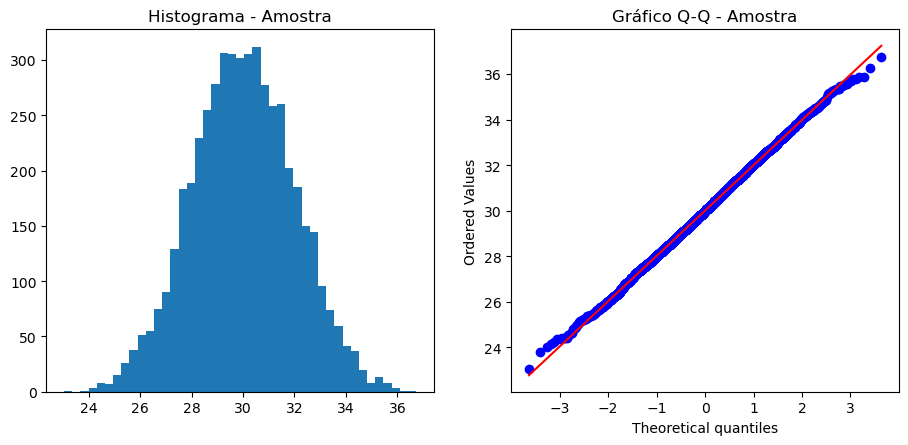

In [12]:
# Verificação se os dados estão normalmente distribuídos
plt.figure(figsize=(11, 16))
plot_data(amostra, "Amostra", 1)

In [13]:
# Realizando o teste Z para uma amostra
z, regiao_critica, rejeitar_hipotese_nula, tipo_teste = teste_z_amostra(media_amostra, media_populacional, desvio_populacional, tamanho_amostra, alpha)

# Imprimindo os resultados
print("\n-- Resultados do Teste Z --")

# a diferença entre a média da sua amostra e a média populacional, quando normalizada pelo desvio padrão da população e ajustada pelo tamanho da amostra
print(f"\nEstatística de teste Z: \033[1m{z}\033[0m")
print(f"\nRegião crítica: \033[1m{regiao_critica}\033[0m")


-- Resultados do Teste Z --

Estatística de teste Z: 0.26386821573792146

Região crítica: (1.6448536269514722, inf)


# Relatório

**Contexto da Pesquisa**: Pesquisadores coletaram dados de peso de biscoitos para determinar se a média do peso dos biscoitos coletados é significativamente diferente da média anunciada pela empresa.

**Hipóteses**: 

    H0: A média do peso dos biscoitos é igual à média anunciada pela empresa (30g).
    HA: A média do peso dos biscoitos é diferente da média anunciada pela empresa.
    
**Conclusão**:
    
Com base no teste Z, rejeitamos a hipótese nula. Isso indica que há evidências suficientes para concluir que a média do peso dos biscoitos coletados é significativamente diferente da média anunciada pela empresa (30g).

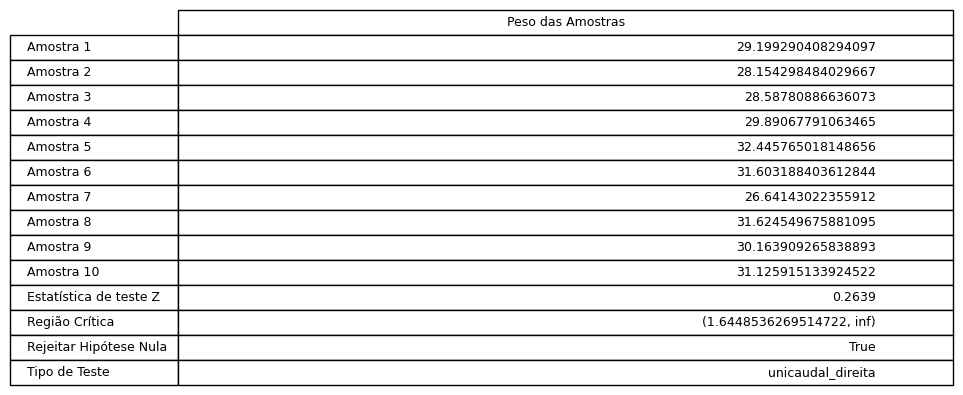

In [14]:
# Selecionar apenas algumas amostras para mostrar na tabela
table_data_amostra = amostra[:10].reshape(-1, 1)
row_labels_amostra = [f"Amostra {i+1}" for i in range(10)]

# Resultados do teste Z
table_data_teste = [
    [f"{z:.4f}"],
    [f"{regiao_critica}"],
    [f"{rejeitar_hipotese_nula}"],
    [f"{tipo_teste}"]
]
row_labels_teste = ["Estatística de teste Z", "Região Crítica", "Rejeitar Hipótese Nula", "Tipo de Teste"]

# Montar a tabela combinando amostra e resultados do teste Z
table_data = np.vstack([table_data_amostra, table_data_teste])
row_labels = row_labels_amostra + row_labels_teste
col_labels = ['Peso das Amostras']

# Plotar a tabela
fig, ax = plt.subplots(figsize=(10, 4))  # Ajustar o tamanho se necessário
table = ax.table(cellText=table_data, colLabels=col_labels, rowLabels=row_labels, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)
ax.axis('off')
plt.show()